# Building Makemore: Multilayer Perceptron


- Using multilayer perceptron to predict the next word
- Using the paper by Bengio et al. 2003
- We want a character level model, in the paper they use word level model
- They have 17 000 words and for each word there is a 30 dimensional feature vector
- The idea is that simliar words in similar areas of a sentence will have similar feature vector

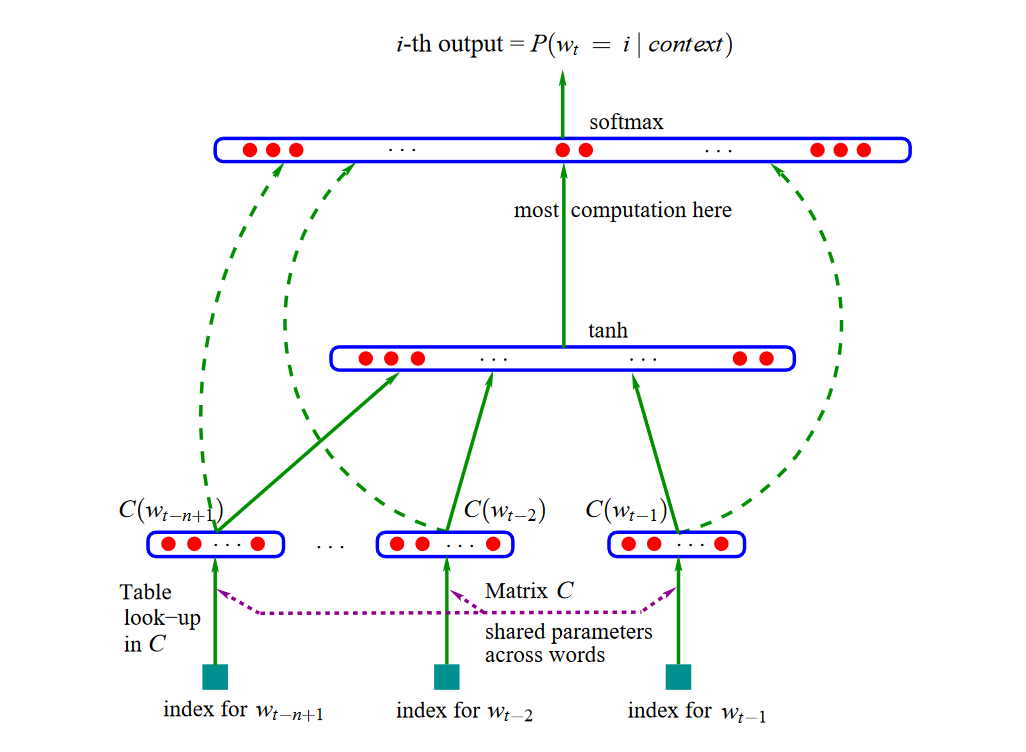

# 1. The Training set

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [2]:
# read in all the words
words = open('C:/Users/preet/Documents/Keep_Project/names.txt').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [5]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []   # X is the input and Y is the label
# ... is the inut and the output is e


for w in words[:5]:
    print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [6]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [7]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [8]:
# Need to build look up table C (im guessing these are the weights)
C = torch.randn((27,2))

In [9]:
# also want to one hot encode our inputs but we wont use that we will just index

F.one_hot(torch.tensor(5), num_classes = 27).float() @ C

tensor([ 0.2436, -1.0642])

In [10]:
C[5]

tensor([ 0.2436, -1.0642])

In [11]:
# can also index with a list or tensor

C[torch.tensor([5,6,7,7])]

tensor([[ 0.2436, -1.0642],
        [ 0.3150, -0.6579],
        [ 0.2545, -1.5897],
        [ 0.2545, -1.5897]])

In [12]:
C[X]

tensor([[[ 0.9283, -0.6470],
         [ 0.9283, -0.6470],
         [ 0.9283, -0.6470]],

        [[ 0.9283, -0.6470],
         [ 0.9283, -0.6470],
         [ 0.2436, -1.0642]],

        [[ 0.9283, -0.6470],
         [ 0.2436, -1.0642],
         [-0.1237,  0.6501]],

        [[ 0.2436, -1.0642],
         [-0.1237,  0.6501],
         [-0.1237,  0.6501]],

        [[-0.1237,  0.6501],
         [-0.1237,  0.6501],
         [-0.2431, -0.6047]],

        [[ 0.9283, -0.6470],
         [ 0.9283, -0.6470],
         [ 0.9283, -0.6470]],

        [[ 0.9283, -0.6470],
         [ 0.9283, -0.6470],
         [ 1.5117,  0.0801]],

        [[ 0.9283, -0.6470],
         [ 1.5117,  0.0801],
         [ 1.2131,  0.8442]],

        [[ 1.5117,  0.0801],
         [ 1.2131,  0.8442],
         [ 0.5926,  0.8011]],

        [[ 1.2131,  0.8442],
         [ 0.5926,  0.8011],
         [ 0.3059, -0.0319]],

        [[ 0.5926,  0.8011],
         [ 0.3059, -0.0319],
         [ 0.5926,  0.8011]],

        [[ 0.3059, -0

In [13]:
C[X].shape

torch.Size([32, 3, 2])

In [14]:
X[13,2]

tensor(1)

In [15]:
C[X][13,2]

emb = C[X]

# Constructing the Hidden layer


In [16]:
W1 = torch.randn((6,100))
b1 = torch.randn(100)


In [17]:
# we need to multiply it by the emdbedded matrix to get out output but that does work right now

emb@ W1 + b1   # doesnt work cause the sizes of the matricies are not comaptible



RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [18]:
# concatinate the last two dimentions 

emb[:,0,:] # 32x2 embedding he says for the first word but its the first letter...

tensor([[ 0.9283, -0.6470],
        [ 0.9283, -0.6470],
        [ 0.9283, -0.6470],
        [ 0.2436, -1.0642],
        [-0.1237,  0.6501],
        [ 0.9283, -0.6470],
        [ 0.9283, -0.6470],
        [ 0.9283, -0.6470],
        [ 1.5117,  0.0801],
        [ 1.2131,  0.8442],
        [ 0.5926,  0.8011],
        [ 0.3059, -0.0319],
        [ 0.9283, -0.6470],
        [ 0.9283, -0.6470],
        [ 0.9283, -0.6470],
        [-0.2431, -0.6047],
        [ 0.9283, -0.6470],
        [ 0.9283, -0.6470],
        [ 0.9283, -0.6470],
        [ 0.5926,  0.8011],
        [-0.4106, -0.0679],
        [-0.2431, -0.6047],
        [ 1.1347, -1.1757],
        [ 0.2436, -1.0642],
        [ 1.2131,  0.8442],
        [ 0.9283, -0.6470],
        [ 0.9283, -0.6470],
        [ 0.9283, -0.6470],
        [-0.4106, -0.0679],
        [ 1.5117,  0.0801],
        [ 0.9202, -1.6784],
        [-2.0150, -1.3755]])

In [19]:
torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]],1)

tensor([[ 0.9283, -0.6470,  0.9283, -0.6470,  0.9283, -0.6470],
        [ 0.9283, -0.6470,  0.9283, -0.6470,  0.2436, -1.0642],
        [ 0.9283, -0.6470,  0.2436, -1.0642, -0.1237,  0.6501],
        [ 0.2436, -1.0642, -0.1237,  0.6501, -0.1237,  0.6501],
        [-0.1237,  0.6501, -0.1237,  0.6501, -0.2431, -0.6047],
        [ 0.9283, -0.6470,  0.9283, -0.6470,  0.9283, -0.6470],
        [ 0.9283, -0.6470,  0.9283, -0.6470,  1.5117,  0.0801],
        [ 0.9283, -0.6470,  1.5117,  0.0801,  1.2131,  0.8442],
        [ 1.5117,  0.0801,  1.2131,  0.8442,  0.5926,  0.8011],
        [ 1.2131,  0.8442,  0.5926,  0.8011,  0.3059, -0.0319],
        [ 0.5926,  0.8011,  0.3059, -0.0319,  0.5926,  0.8011],
        [ 0.3059, -0.0319,  0.5926,  0.8011, -0.2431, -0.6047],
        [ 0.9283, -0.6470,  0.9283, -0.6470,  0.9283, -0.6470],
        [ 0.9283, -0.6470,  0.9283, -0.6470, -0.2431, -0.6047],
        [ 0.9283, -0.6470, -0.2431, -0.6047,  0.3059, -0.0319],
        [-0.2431, -0.6047,  0.3059, -0.0

In [20]:
torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]],1).shape

torch.Size([32, 6])

In [21]:
# to generalize to all blaco sizes we will use torch.unbind.
torch.cat(torch.unbind(emb,1),1)

tensor([[ 0.9283, -0.6470,  0.9283, -0.6470,  0.9283, -0.6470],
        [ 0.9283, -0.6470,  0.9283, -0.6470,  0.2436, -1.0642],
        [ 0.9283, -0.6470,  0.2436, -1.0642, -0.1237,  0.6501],
        [ 0.2436, -1.0642, -0.1237,  0.6501, -0.1237,  0.6501],
        [-0.1237,  0.6501, -0.1237,  0.6501, -0.2431, -0.6047],
        [ 0.9283, -0.6470,  0.9283, -0.6470,  0.9283, -0.6470],
        [ 0.9283, -0.6470,  0.9283, -0.6470,  1.5117,  0.0801],
        [ 0.9283, -0.6470,  1.5117,  0.0801,  1.2131,  0.8442],
        [ 1.5117,  0.0801,  1.2131,  0.8442,  0.5926,  0.8011],
        [ 1.2131,  0.8442,  0.5926,  0.8011,  0.3059, -0.0319],
        [ 0.5926,  0.8011,  0.3059, -0.0319,  0.5926,  0.8011],
        [ 0.3059, -0.0319,  0.5926,  0.8011, -0.2431, -0.6047],
        [ 0.9283, -0.6470,  0.9283, -0.6470,  0.9283, -0.6470],
        [ 0.9283, -0.6470,  0.9283, -0.6470, -0.2431, -0.6047],
        [ 0.9283, -0.6470, -0.2431, -0.6047,  0.3059, -0.0319],
        [-0.2431, -0.6047,  0.3059, -0.0

In [22]:
# there is another way to do it with .view

a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [23]:
a.view(3,3,2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [24]:
a.storage()

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [25]:
# it is always stored as a 1d vector

emb.view(32,6)

tensor([[ 0.9283, -0.6470,  0.9283, -0.6470,  0.9283, -0.6470],
        [ 0.9283, -0.6470,  0.9283, -0.6470,  0.2436, -1.0642],
        [ 0.9283, -0.6470,  0.2436, -1.0642, -0.1237,  0.6501],
        [ 0.2436, -1.0642, -0.1237,  0.6501, -0.1237,  0.6501],
        [-0.1237,  0.6501, -0.1237,  0.6501, -0.2431, -0.6047],
        [ 0.9283, -0.6470,  0.9283, -0.6470,  0.9283, -0.6470],
        [ 0.9283, -0.6470,  0.9283, -0.6470,  1.5117,  0.0801],
        [ 0.9283, -0.6470,  1.5117,  0.0801,  1.2131,  0.8442],
        [ 1.5117,  0.0801,  1.2131,  0.8442,  0.5926,  0.8011],
        [ 1.2131,  0.8442,  0.5926,  0.8011,  0.3059, -0.0319],
        [ 0.5926,  0.8011,  0.3059, -0.0319,  0.5926,  0.8011],
        [ 0.3059, -0.0319,  0.5926,  0.8011, -0.2431, -0.6047],
        [ 0.9283, -0.6470,  0.9283, -0.6470,  0.9283, -0.6470],
        [ 0.9283, -0.6470,  0.9283, -0.6470, -0.2431, -0.6047],
        [ 0.9283, -0.6470, -0.2431, -0.6047,  0.3059, -0.0319],
        [-0.2431, -0.6047,  0.3059, -0.0

In [26]:
h = emb.view(-1,6)@W1+b1

# The last layer

In [27]:
W2 = torch.randn((100,27))
b2 = torch.rand(27)


In [28]:
logits = h@W2+b2

In [29]:
logits.shape

torch.Size([32, 27])

In [30]:
counts = logits.exp()


In [31]:
prob = counts/counts.sum(1,keepdims=True)

In [32]:
prob.shape

torch.Size([32, 27])

In [33]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [34]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [35]:
prob[torch.arange(32),Y]

tensor([6.5861e-44, 1.0000e+00, 9.9998e-01, 4.8131e-07, 5.6407e-22, 2.9518e-28,
        6.8043e-38, 9.8318e-36, 1.8069e-26, 1.4812e-24, 1.4359e-18, 2.4457e-19,
        6.7023e-18, 3.7266e-09, 3.7758e-08, 7.2810e-11, 3.8063e-28, 3.3757e-28,
        2.9341e-13, 3.0752e-20, 6.5369e-18, 3.0299e-14, 8.6740e-43, 4.1090e-24,
        2.7721e-29, 1.7227e-33, 2.2226e-18, 8.4015e-10, 2.7753e-21, 0.0000e+00,
        2.6468e-24, 8.4605e-20])

# Loss and learning


In [36]:
loss = -prob[torch.arange(32),Y].log().mean()

In [37]:
loss

tensor(inf)

In [38]:
# or we can: cross_entory is more well behaved in terms of the numbers and more effcient

F.cross_entropy(logits, Y)

tensor(47.5478)

# Forward pass


In [39]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [40]:
sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [41]:
for p in parameters:
        p.requires_grad = True

In [42]:
for _ in range(10):
    
    # Forward pass
    emb = C[X]
    h = torch.tanh(emb.view(-1,6)@W1 + b1)
    logits = h@W2 + b2
    loss = F.cross_entropy(logits,Y)
    print(loss.item())

    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # Update 
    for p in parameters:
        p.data += -0.1 * p.grad



17.769712448120117
13.656402587890625
11.298768997192383
9.452457427978516
7.984262466430664
6.891321182250977
6.1000142097473145
5.452036380767822
4.898151874542236
4.414664268493652


### We are only fiting 32 example- so we are overfitting

In [43]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []   # X is the input and Y is the label
# ... is the inut and the output is e


for w in words:
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [44]:
X.shape

torch.Size([228146, 3])

In [45]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
        p.requires_grad = True

In [46]:
for _ in range(10):
    
    # Forward pass
    emb = C[X]
    h = torch.tanh(emb.view(-1,6)@W1 + b1)
    logits = h@W2 + b2
    loss = F.cross_entropy(logits,Y)
    print(loss.item())

    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # Update 
    for p in parameters:
        p.data += -0.1 * p.grad

19.505229949951172
17.08448600769043
15.776532173156738
14.833340644836426
14.002605438232422
13.253262519836426
12.57991886138916
11.983102798461914
11.47049331665039
11.05185604095459


# It takes to long! lets do mini batch

In [47]:
torch.randint(0,X.shape[0],(32,))

tensor([227952,  29357, 195426,  21585,   3294, 112473, 182662, 180393, 108445,
        118185,  98789,  91904,   7213,  81988,  96114,  43467, 158847, 161771,
        222636,  26002, 108391, 181262,  84851, 124485, 165306, 203572, 151741,
        207675, 207672,  45678,  93063, 119769])

In [48]:
for _ in range(100):
    # Mini-batch
    ix = torch.randint(0,X.shape[0],(32,))
    
    # Forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1,6)@W1 + b1)
    logits = h@W2 + b2
    loss = F.cross_entropy(logits,Y[ix])
    print(loss.item())

    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # Update 
    for p in parameters:
        p.data += -0.1 * p.grad

11.959709167480469
8.653264999389648
10.670052528381348
11.422905921936035
9.2103910446167
9.829170227050781
8.968367576599121
8.781864166259766
8.002918243408203
8.509725570678711
7.5423583984375
6.9266743659973145
8.774331092834473
8.816231727600098
8.164185523986816
8.988358497619629
6.40086555480957
5.993404865264893
6.8877387046813965
6.900862693786621
7.663836479187012
7.092263221740723
8.410157203674316
6.616113662719727
6.897470951080322
6.76749324798584
7.260608673095703
7.403313636779785
6.0565266609191895
5.969692707061768
6.773233413696289
5.9607930183410645
6.923708438873291
4.06016731262207
5.600770950317383
6.687020301818848
6.734341621398926
6.758145332336426
5.760313510894775
3.596564292907715
5.512600898742676
4.485296726226807
5.31428337097168
4.485028266906738
4.626417636871338
6.00679874420166
4.951079368591309
5.853142738342285
5.116649627685547
4.290972709655762
4.641864776611328
5.474664688110352
4.632934093475342
3.90301775932312
3.470587730407715
4.66011428833

In [49]:

for _ in range(100):
    # Mini-batch
    ix = torch.randint(0,X.shape[0],(32,))
    
    # Forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1,6)@W1 + b1)
    logits = h@W2 + b2
    loss = F.cross_entropy(logits,Y[ix])

    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # Update 
    for p in parameters:
        p.data += -1 * p.grad

    
print(loss.item())

10.508941650390625


In [50]:
emb = C[X]
h = torch.tanh(emb.view(-1,6)@W1 + b1)
logits = h@W2 + b2
loss = F.cross_entropy(logits,Y)
loss

tensor(8.4365, grad_fn=<NllLossBackward0>)

In [51]:
lre = torch.linspace(-3,0,1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [52]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [53]:
for p in parameters:
        p.requires_grad = True

In [54]:
lri = []
lossi = []

for i in range(1000):
    # Mini-batch
    ix = torch.randint(0,X.shape[0],(32,))
    
    # Forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1,6)@W1 + b1)
    logits = h@W2 + b2
    loss = F.cross_entropy(logits,Y[ix])

    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # Update 
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad
    
    # track stats
    lri.append(lre[i])
    lossi.append(loss.item())
print(loss.item())

7.826449394226074


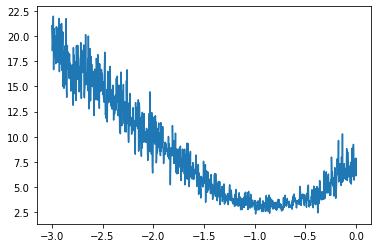

In [55]:
plt.plot(lri,lossi)

In [56]:
# 10^(-1) was a good learning rate

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True


In [57]:

for i in range(10000):
    # Mini-batch
    ix = torch.randint(0,X.shape[0],(32,))
    
    # Forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1,6)@W1 + b1)
    logits = h@W2 + b2
    loss = F.cross_entropy(logits,Y[ix])

    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # Update 
    for p in parameters:
        p.data += -0.01 * p.grad
print(loss.item())

2.299527883529663


In [58]:
emb = C[X]
h = torch.tanh(emb.view(-1,6)@W1 + b1)
logits = h@W2 + b2
loss = F.cross_entropy(logits,Y)
loss

tensor(2.5718, grad_fn=<NllLossBackward0>)

# Using train dev and test model

In [59]:
# Build the dataset
words = open('C:/Users/preet/Documents/Keep_Project/names.txt').read().splitlines()

def build_dataset(word_s):
    block_size = 3
    X,Y = [],[]
    for w in word_s:

        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix] # crop and append

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X,Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev,Ydev = build_dataset(words[n1:n2])
Xte,Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [60]:

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True


In [61]:
stepi = []
lossi = []
for i in range(30000):
    # Mini-batch
    ix = torch.randint(0,Xtr.shape[0],(32,))
    
    # Forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1,6)@W1 + b1)
    logits = h@W2 + b2
    loss = F.cross_entropy(logits,Ytr[ix])

    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # Update 
    for p in parameters:
        p.data += -0.01 * p.grad
    
    # stats
    stepi.append(i)
    lossi.append(loss.item())
    
print(loss.item())

2.588562250137329


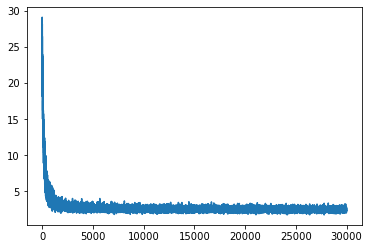

In [62]:
plt.plot(stepi,lossi)

In [63]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1,6)@W1 + b1)
logits = h@W2 + b2
loss = F.cross_entropy(logits,Ydev)
loss

tensor(2.4623, grad_fn=<NllLossBackward0>)

In [64]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1,6)@W1 + b1)
logits = h@W2 + b2
loss = F.cross_entropy(logits,Ytr)
loss

tensor(2.4702, grad_fn=<NllLossBackward0>)

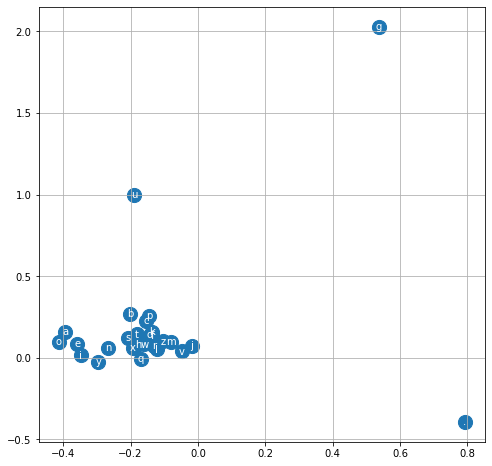

In [65]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

# Its under fitting the data so lets try to increase the embedding. so there will be three numbers for every character rather than 2

In [66]:

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True


In [67]:
stepi = []
lossi = []

In [ ]:
for i in range(50000):
    # Mini-batch
    ix = torch.randint(0,Xtr.shape[0],(32,))
    
    # Forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1,30)@W1 + b1)
    logits = h@W2 + b2
    loss = F.cross_entropy(logits,Ytr[ix])

    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # Update 
    for p in parameters:
        p.data += -0.01 * p.grad
    
    # stats
    stepi.append(i)
    lossi.append(loss.log10().item())
    
print(loss.item())

In [ ]:
plt.plot(stepi,lossi)

In [ ]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30)@W1 + b1)
logits = h@W2 + b2
loss = F.cross_entropy(logits,Ydev)
loss

In [ ]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1,30)@W1 + b1)
logits = h@W2 + b2
loss = F.cross_entropy(logits,Ytr)
loss

# sample

In [ ]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
        emb = C[torch.tensor([context])] # (1,block_size,d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    
    print(''.join(itos[i] for i in out))